# Trabalho de Criptografia 


## Introdução

No trabalho da matéria de segurança cibernética da parte de criptografia, realizamos a resolução do challenge 18 do set 2 do site https://cryptopals.com/, no qual realizou-se o desenvolvimento da criptografia CTR.

In [13]:
from Crypto.Cipher import AES
import struct
from base64 import b64decode

## Componentes

Entretanto, embora tenhamos decidido em realizar o challenge 18, foi necessário realizar a implementação de outros componentes responsáveis para a execução, sendo eles:

- Função XOR;
- Função de padding PKCS#7;
- Método de criptografia ECB;

Somados à aplicação do Advanced Encryption Standard através da biblioteca pycryptodome.

### Função XOR

A Função XOR tem seu uso em específico para o método de criptografia CTR, Sendo realizado logo após o Encrypt (neste caso a partir do método ECB) do contador junto do elemento nonce e a Key utilizada neste caso para definir o bloco de Ciphertext

![counter block cipher.png](<attachment:counter block cipher.png>)

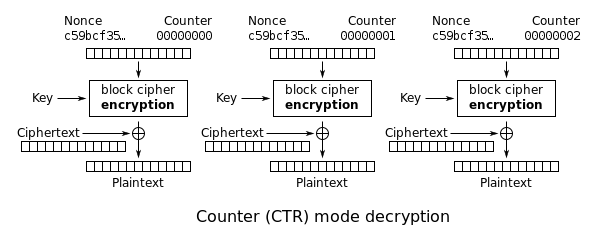

In [14]:
def xor(a, b):
    return bytes([x ^ y for x, y in zip(a, b)])

### PKCS#7 Padding + AES ECB Encrypt

Neste caso, utilizou-se o Padding do tipo PKCS#7, assim como o padrão AES para aplicar-se o modelo Electronic Codebook de Criptografia de acordo com módulos de desafios anteriores apresentados pelo site

In [15]:
def PKCS7_pad(string, blocksize):
    '''Função para aplicar Padding PKCS7'''    
    if len(string) == blocksize:
        return string
    
    padding = blocksize - len(string) % blocksize
    
    res = string + bytes([padding] * (padding))
    
    return res

def PKCS7_unpad(string):
    '''Função específica para realizar o Unpadding de PKCS7'''
    padding = string[-1]
    if padding > 16:
        raise Exception('Invalid padding')
    
    for i in range(1, padding + 1):
        if string[-i] != padding:
            raise Exception('Invalid padding')
    
    return string[:-padding]

Quanto a aplicação do modelo ECB, realizamos sua implementação inicial dando foco para blocos unitários de plaintext e em futuras implementações do CTR, aplicamos ele de maneira Iterativa 
![ECB criptografia.webp](<attachment:ECB criptografia.webp>)
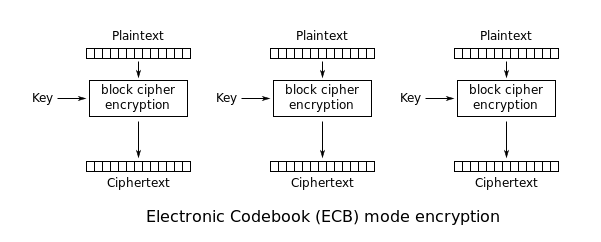

In [16]:
#Aplicação da Criptografia por ECB usando AES em um único bloco
def AES_ECB_encrypt(data, key):
    '''Aplicação da Criptografia por ECB usando o Advanced Encryption Standard, Nesse caso se aplica a chave por bloco de plaintext'''
    key = bytes(key, encoding='utf-8')
    cipher = AES.new(key, AES.MODE_ECB)

    #Necessário "preencher" os dados para se encaixar no bloco

    encrypt_data = PKCS7_pad(data, AES.block_size)
    
    
    return cipher.encrypt(encrypt_data)

def AES_ECB_decrypt(ciphertext, key):
    cipher = AES.new(key, AES.MODE_ECB)
    #Necessaŕio descriptografar para depois adicionar o preenchimento
    descrypted_data = cipher.decrypt(ciphertext)
    return PKCS7_unpad(descrypted_data)

## CTR Block Cipher

No caso do desafio 18, tornou-se necessário a aplicação e desenvolvimento de uma função de criptografia orientada pelo modelo CTR, sendo essencial a aplicação das funções implementadas em desafios anteriores. 

In [17]:
def AES_CTR_encrypt(plaintext, key, nonce):
    '''Aplicação de CTR usando como base ECB'''
    ciphertext = b''
    counter = 0

    for i in range(0, len(plaintext), len(key)):
        #Realizando a divisão de blocos de plaintext
        block = plaintext[i: i + len(key)]
        nonce_e_counter = struct.pack("<QQ", nonce, counter)

        #Criptografia do nonce+counter e key
        encrypted = AES_ECB_encrypt(nonce_e_counter, key)

        new_cipher = xor(block, encrypted)

        counter += 1
        #Incrementar cipher
        ciphertext += new_cipher

    return ciphertext


def main():
    text = b64decode("L77na/nrFsKvynd6HzOoG7GHTLXsTVu9qvY/2syLXzhPweyyMTJULu/6/kXX0KSvoOLSFQ==")
    key = "YELLOW SUBMARINE"
    nonce = 0

    print(AES_CTR_encrypt(text, key, nonce))


In [18]:
if __name__ == "__main__":
    main()

b"Yo, VIP Let's kick it Ice, Ice, baby Ice, Ice, baby "
